### **Problem 1: Basic LangGraph**
**Scenario**: Text Processor
You run a content moderation system. Build a simple graph that:

1. Takes user text input
2. Counts the number of words
3. Converts text to uppercase
4. Adds a timestamp
5. Returns the processed result

**Requirements:**

- Use StateGraph
- Create 3 nodes (count_words, uppercase, add_timestamp)
- Linear flow: entry → count → uppercase → timestamp → END
- No conditions, no loops, just straight flow

**Expected Input:**
```python
{"text": "hello world", "word_count": 0, "timestamp": ""}
```
```python

{"text": "HELLO WORLD", "word_count": 2, "timestamp": "2024-01-15 10:30:00"}

1. *Define State*
2. *Define Graphs*
3. *Add Nodes*
4. *Add Edges*
5. *Compile the Graph*
6. *execute the Graph*

In [35]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [21]:
# define state
class TextState(TypedDict):

    text: str
    word_count: int
    timestamp: str
    

In [22]:
def count_word(state: TextState)-> TextState:
    input_text = state['text']
    words = input_text.split()
    state['word_count'] = len(words)

    return state

def uppercase(state: TextState)-> TextState:
    state['text'] = state['text'].upper()
    return state


def timestamp(state: TextState)-> TextState:
    from datetime import datetime

    state['timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    return state

In [23]:
# define graphs
graph = StateGraph(TextState)

# add nodes
graph.add_node("count_word", count_word)
graph.add_node("uppercase", uppercase)
graph.add_node("timestamp", timestamp)

In [30]:
# add edges
graph.add_edge(START, "count_word")
graph.add_edge("count_word", "uppercase")
graph.add_edge("uppercase", "timestamp")
graph.add_edge("timestamp", END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [32]:
# compile the graph
workflow = graph.compile()

# execute the graph
initial_input = {'text': 'hii how are you!'}

result = workflow.invoke(initial_input)

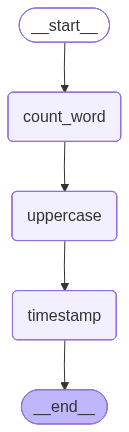

In [33]:
workflow

In [34]:
result

{'text': 'HII HOW ARE YOU!',
 'word_count': 4,
 'timestamp': '2025-12-07 18:32:27'}